In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# import os
# import shutil
# from pathlib import Path

# # Paths
# source_classes = {
#     "Potholes": 1,  # class_id
#     "Garbage": 0
# }

# output_root = Path("/kaggle/working/dataset")  # final YOLO dataset
# input_root = "urban-issues-dataset"

# splits = ["test","train", "valid"]

# # Create final YOLO structure
# for split in splits:
#     (output_root / split / "images").mkdir(parents=True, exist_ok=True)
#     (output_root / split / "labels").mkdir(parents=True, exist_ok=True)

# # Merge each class folder into YOLO format
# for class_name, class_id in source_classes.items():
#     for split in splits:
#         src_images = Path(f"/kaggle/input/{input_root}/{class_name}/{class_name}/{split}/images")
#         src_labels = Path(f"/kaggle/input/{input_root}/{class_name}/{class_name}/{split}/labels")
        
#         for img_file in src_images.glob("*.*"):
#             # Copy image
#             dest_img = output_root / split / "images" / f"{class_name}_{img_file.name}"
#             shutil.copy(img_file, dest_img)
            
#             # Copy and update label file
#             label_file = src_labels / f"{img_file.stem}.txt"
#             dest_label = output_root / split / "labels" / f"{class_name}_{img_file.stem}.txt"
#             with open(label_file, "r") as f:
#                 lines = f.readlines()
#             # Update class IDs to match merged dataset
#             new_lines = []
#             for line in lines:
#                 parts = line.strip().split()
#                 parts[0] = str(class_id)
#                 new_lines.append(" ".join(parts) + "\n")
#             with open(dest_label, "w") as f:
#                 f.writelines(new_lines)

# print("Merged dataset created at", output_root)

In [4]:
# import shutil
# import os

# output_dir = "/kaggle/working"

# # Delete everything inside the directory
# for filename in os.listdir(output_dir):
#     file_path = os.path.join(output_dir, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)  # remove file
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)  # remove foldear
#     except Exception as e:
#         print(f"Failed to delete {file_path}. Reason: {e}")

# print("/kaggle/working cleared")

In [5]:
import os
import shutil
from pathlib import Path

source_root = Path("/kaggle/input/urban-issues-dataset")

class_map = {
    "Potholes": 1,
    "Garbage": 0 
}

# Output YOLO dataset structure
output_root = Path("/kaggle/working/dataset")
splits = ["train", "valid", "test"]

# Create output folders
for split in splits:
    (output_root / "images" / split).mkdir(parents=True, exist_ok=True)
    (output_root / "labels" / split).mkdir(parents=True, exist_ok=True)

# Merge images & labels
for class_name, class_id in class_map.items():
    for split in splits:
        img_dir = source_root / class_name / class_name / split / "images"
        label_dir = source_root / class_name / class_name / split / "labels"
        
        for img_file in img_dir.glob("*.*"):
            # Copy image
            dest_img_path = output_root / "images" / split / f"{class_name}_{img_file.name}"
            shutil.copy(img_file, dest_img_path)
            
            # Read & update label file
            src_label_path = label_dir / f"{img_file.stem}.txt"
            dest_label_path = output_root / "labels" / split / f"{class_name}_{img_file.stem}.txt"
            
            if src_label_path.exists():
                with open(src_label_path, "r") as f:
                    lines = f.readlines()
                new_lines = []
                for line in lines:
                    parts = line.strip().split()
                    parts[0] = str(class_id)  # update class ID
                    new_lines.append(" ".join(parts) + "\n")
                with open(dest_label_path, "w") as f:
                    f.writelines(new_lines)

print("YOLO dataset ready at:", output_root)

YOLO dataset ready at: /kaggle/working/dataset


In [6]:
# Use the model
results = model.train(data="/kaggle/input/urban-issues-dataset/config.yaml", epochs=100)  # train the model

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/urban-issues-dataset/config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1250.0±464.6 MB/s, size: 56.9 KB)


train: Scanning /kaggle/working/dataset/labels/train... 5892 images, 70 backgrounds, 0 corrupt: 100%|██████████| 5892/5892 [00:04<00:00, 1413.74it/s]


train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 421.9±191.9 MB/s, size: 41.2 KB)


val: Scanning /kaggle/working/dataset/labels/valid... 795 images, 0 backgrounds, 0 corrupt: 100%|██████████| 795/795 [00:00<00:00, 1433.96it/s]

val: New cache created: /kaggle/working/dataset/labels/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G      3.279      3.727      3.803         25        640: 100%|██████████| 369/369 [01:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.57it/s]

                   all        795       2166     0.0112     0.0935    0.00569    0.00165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.62G      2.685      3.302      2.982         16        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]

                   all        795       2166      0.116      0.104     0.0202    0.00589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.63G      2.419      2.971      2.595         26        640: 100%|██████████| 369/369 [01:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        795       2166      0.203      0.248     0.0916     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.66G      2.324      2.784      2.444         39        640: 100%|██████████| 369/369 [01:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.53it/s]

                   all        795       2166      0.224      0.169      0.104     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.86G       2.23      2.633      2.348         23        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.16it/s]

                   all        795       2166      0.293      0.248       0.19     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.87G      2.197      2.549      2.278         27        640: 100%|██████████| 369/369 [01:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        795       2166      0.308      0.263      0.205     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.88G      2.143      2.459       2.22         42        640: 100%|██████████| 369/369 [01:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        795       2166      0.379      0.297      0.256      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.91G      2.122      2.414        2.2         20        640: 100%|██████████| 369/369 [01:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.53it/s]

                   all        795       2166      0.409      0.328      0.288      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.93G      2.088      2.352      2.148         17        640: 100%|██████████| 369/369 [01:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]

                   all        795       2166      0.393      0.336      0.308      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.94G      2.073      2.302      2.135         63        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        795       2166      0.438      0.358      0.346      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.95G      2.041      2.278       2.11         19        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.49it/s]

                   all        795       2166      0.436      0.355      0.332      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.98G      2.034       2.24      2.087         17        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]

                   all        795       2166      0.459      0.347      0.358      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.99G      2.004      2.216      2.067         13        640: 100%|██████████| 369/369 [01:02<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.55it/s]

                   all        795       2166      0.447      0.347      0.345      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.01G      1.999      2.191      2.063         13        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]

                   all        795       2166      0.452      0.384      0.383      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.02G       1.99      2.155      2.042         12        640: 100%|██████████| 369/369 [01:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.18it/s]

                   all        795       2166      0.483      0.369      0.373      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.04G      1.988      2.141      2.038         14        640: 100%|██████████| 369/369 [01:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.30it/s]

                   all        795       2166      0.501      0.392      0.398      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.06G       1.97      2.141       2.03         21        640: 100%|██████████| 369/369 [01:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        795       2166      0.461      0.383      0.379      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.08G      1.961      2.095      2.011         25        640: 100%|██████████| 369/369 [01:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]

                   all        795       2166      0.496      0.377      0.391      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.09G      1.952       2.06      2.002         12        640: 100%|██████████| 369/369 [01:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.59it/s]

                   all        795       2166      0.479      0.389      0.395      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.11G      1.945      2.057      1.993         12        640: 100%|██████████| 369/369 [01:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]

                   all        795       2166       0.55      0.409      0.431       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.13G      1.928      2.028      1.978         23        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.59it/s]

                   all        795       2166       0.56      0.404      0.438      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.15G      1.917      2.028      1.974         16        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]

                   all        795       2166      0.544      0.387      0.436      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.16G      1.911      2.011      1.966         12        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.65it/s]

                   all        795       2166       0.56      0.407      0.448      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.18G      1.915      1.981       1.96         13        640: 100%|██████████| 369/369 [01:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.50it/s]

                   all        795       2166      0.519      0.428      0.446      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.2G      1.898      1.981      1.952         12        640: 100%|██████████| 369/369 [01:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]

                   all        795       2166      0.551      0.429      0.464      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.21G        1.9      1.959      1.944         24        640: 100%|██████████| 369/369 [01:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]

                   all        795       2166      0.578      0.431      0.482      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.22G      1.901      1.946      1.941         44        640: 100%|██████████| 369/369 [01:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.43it/s]

                   all        795       2166       0.53      0.454       0.48      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.25G      1.884      1.935      1.935         30        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        795       2166      0.547      0.441      0.477      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.27G      1.864      1.926      1.929         31        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]

                   all        795       2166      0.574      0.456      0.493      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.28G      1.869      1.902       1.92         31        640: 100%|██████████| 369/369 [01:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]

                   all        795       2166      0.585      0.438      0.483      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.47G      1.848      1.875      1.909         32        640: 100%|██████████| 369/369 [01:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]

                   all        795       2166       0.63      0.418      0.483      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.5G      1.861      1.888      1.915         23        640: 100%|██████████| 369/369 [01:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]

                   all        795       2166      0.571      0.451      0.494      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.52G      1.862      1.893      1.915         66        640: 100%|██████████| 369/369 [01:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        795       2166      0.606      0.455      0.514      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.54G      1.867      1.868      1.906         28        640: 100%|██████████| 369/369 [01:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.67it/s]

                   all        795       2166      0.611      0.458      0.512      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.54G      1.859      1.846      1.901         19        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]

                   all        795       2166      0.559      0.478       0.51      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.57G       1.85      1.849      1.891          8        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]

                   all        795       2166      0.558       0.47      0.504      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.59G      1.846      1.846       1.89         29        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]

                   all        795       2166      0.585      0.471      0.511      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.6G      1.829      1.836      1.884         50        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        795       2166      0.599       0.47      0.519      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.61G      1.837      1.828      1.874         51        640: 100%|██████████| 369/369 [01:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.33it/s]

                   all        795       2166      0.585      0.483      0.523      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.64G      1.828      1.803      1.867         10        640: 100%|██████████| 369/369 [01:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]

                   all        795       2166       0.58      0.466      0.515      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.65G      1.806      1.804      1.874         33        640: 100%|██████████| 369/369 [01:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        795       2166      0.601      0.485      0.529      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.67G      1.824      1.786      1.871         35        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]

                   all        795       2166      0.558      0.478      0.509      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.68G      1.818      1.771       1.86         15        640: 100%|██████████| 369/369 [01:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        795       2166      0.602      0.474      0.534      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.71G      1.803      1.773      1.859          8        640: 100%|██████████| 369/369 [01:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        795       2166      0.569      0.488      0.527      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.72G      1.799      1.755      1.846         13        640: 100%|██████████| 369/369 [01:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.55it/s]

                   all        795       2166      0.601      0.482      0.532      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.74G        1.8      1.756      1.845         37        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]

                   all        795       2166      0.611       0.48      0.538      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.75G      1.784      1.739      1.841         28        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]

                   all        795       2166       0.59      0.498      0.537      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.77G      1.789      1.738      1.835          6        640: 100%|██████████| 369/369 [01:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.71it/s]

                   all        795       2166      0.577      0.494      0.536      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.99G      1.774      1.724      1.839         40        640: 100%|██████████| 369/369 [01:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.65it/s]

                   all        795       2166      0.609      0.497      0.544      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         4G      1.775      1.718      1.836         40        640: 100%|██████████| 369/369 [01:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.31it/s]

                   all        795       2166      0.618      0.496      0.539      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.01G      1.781      1.699      1.817         17        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.65it/s]

                   all        795       2166      0.611      0.507       0.55      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.04G      1.771      1.705      1.821         18        640: 100%|██████████| 369/369 [01:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.67it/s]

                   all        795       2166      0.629      0.501      0.556      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.05G      1.771       1.69      1.815         28        640: 100%|██████████| 369/369 [01:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]

                   all        795       2166      0.624      0.492      0.543      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.07G      1.765        1.7       1.82         46        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.82it/s]

                   all        795       2166      0.626      0.488      0.551      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.08G      1.758      1.678       1.81         15        640: 100%|██████████| 369/369 [01:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]

                   all        795       2166      0.623      0.499      0.549      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.11G      1.752      1.672      1.805         28        640: 100%|██████████| 369/369 [01:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]

                   all        795       2166      0.631      0.505      0.553      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.12G      1.744      1.659      1.807         33        640: 100%|██████████| 369/369 [01:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.84it/s]

                   all        795       2166      0.629      0.511      0.561      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.14G      1.752      1.676      1.812         30        640: 100%|██████████| 369/369 [01:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.80it/s]

                   all        795       2166      0.627      0.509      0.558      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.15G      1.744      1.659      1.798         43        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]

                   all        795       2166      0.633      0.504       0.56      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.17G       1.74      1.639      1.801         15        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.33it/s]

                   all        795       2166      0.632      0.502      0.561      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.19G      1.747      1.659      1.797         39        640: 100%|██████████| 369/369 [01:02<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.66it/s]

                   all        795       2166      0.641      0.515      0.568      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.21G       1.73      1.641      1.794         67        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.67it/s]

                   all        795       2166      0.622      0.508       0.56      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.21G      1.735      1.631      1.795         28        640: 100%|██████████| 369/369 [01:03<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.69it/s]

                   all        795       2166      0.656      0.512      0.569      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.24G      1.719      1.628      1.787         16        640: 100%|██████████| 369/369 [01:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.77it/s]

                   all        795       2166      0.652      0.499      0.568      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.26G      1.724      1.618      1.779         13        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]

                   all        795       2166      0.653      0.501      0.566      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.28G      1.721      1.597      1.773         13        640: 100%|██████████| 369/369 [01:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.71it/s]

                   all        795       2166      0.673      0.504      0.573       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.29G      1.702      1.589      1.766          7        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        795       2166      0.652      0.515      0.576      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.31G       1.72      1.607      1.772         16        640: 100%|██████████| 369/369 [01:03<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.51it/s]

                   all        795       2166      0.644      0.518      0.581      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.33G      1.704      1.578      1.769         13        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.71it/s]

                   all        795       2166      0.654      0.515      0.576      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.34G      1.714      1.578      1.762         16        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.50it/s]

                   all        795       2166      0.656      0.515      0.581      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.35G      1.703      1.583      1.764         59        640: 100%|██████████| 369/369 [01:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.51it/s]

                   all        795       2166      0.652      0.516      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.38G      1.709      1.584      1.761         26        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.41it/s]

                   all        795       2166      0.648      0.523      0.582      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.39G      1.702      1.569      1.754         65        640: 100%|██████████| 369/369 [01:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]

                   all        795       2166      0.653      0.514      0.576      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.41G      1.694      1.548      1.758         42        640: 100%|██████████| 369/369 [01:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]

                   all        795       2166      0.666       0.52      0.588      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.42G      1.686       1.54      1.749         41        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]

                   all        795       2166      0.649      0.526      0.583      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.45G      1.695      1.544      1.748         25        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.07it/s]

                   all        795       2166      0.632      0.526       0.58      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.47G      1.695      1.547      1.756         16        640: 100%|██████████| 369/369 [01:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        795       2166      0.675      0.509      0.585      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.48G      1.686      1.534      1.746          8        640: 100%|██████████| 369/369 [01:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.65it/s]

                   all        795       2166      0.649      0.519      0.583      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.49G      1.676      1.531      1.738         18        640: 100%|██████████| 369/369 [01:03<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]

                   all        795       2166      0.635       0.53      0.583      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.52G      1.681      1.531      1.743         27        640: 100%|██████████| 369/369 [01:03<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        795       2166       0.63      0.535      0.585      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.53G      1.667      1.505      1.732         76        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]

                   all        795       2166      0.633      0.533      0.585      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.55G      1.659      1.503      1.733         22        640: 100%|██████████| 369/369 [01:03<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.80it/s]

                   all        795       2166       0.65      0.528       0.59       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.56G      1.662      1.498      1.722         16        640: 100%|██████████| 369/369 [01:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.77it/s]

                   all        795       2166      0.657      0.522      0.586       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.58G      1.666      1.501      1.726         47        640: 100%|██████████| 369/369 [01:03<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.59it/s]

                   all        795       2166      0.646      0.535       0.59      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       4.6G      1.664      1.499      1.721         27        640: 100%|██████████| 369/369 [01:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        795       2166      0.662      0.531      0.591      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.62G      1.656      1.489      1.718         19        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        795       2166      0.661      0.532      0.592      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.63G      1.651      1.477      1.717         13        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.40it/s]

                   all        795       2166      0.652       0.54      0.598      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.65G      1.664      1.481      1.727         32        640: 100%|██████████| 369/369 [01:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]

                   all        795       2166      0.638      0.547      0.594      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.67G      1.661      1.475      1.716         20        640: 100%|██████████| 369/369 [01:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.35it/s]

                   all        795       2166      0.659      0.531      0.591      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.69G       1.64      1.475      1.715         24        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.69it/s]

                   all        795       2166      0.674      0.521      0.593      0.322


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.69G      1.703      1.442      1.784          4        640: 100%|██████████| 369/369 [01:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        795       2166      0.652      0.536      0.593      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.72G      1.667      1.401      1.768         19        640: 100%|██████████| 369/369 [01:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.74it/s]

                   all        795       2166       0.65      0.549      0.597      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.74G      1.668      1.398      1.766          7        640: 100%|██████████| 369/369 [01:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        795       2166      0.656      0.545      0.597      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.75G      1.666      1.389      1.762          4        640: 100%|██████████| 369/369 [01:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.50it/s]

                   all        795       2166      0.679      0.545        0.6      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.76G      1.662       1.38      1.763         21        640: 100%|██████████| 369/369 [01:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        795       2166      0.663      0.545        0.6      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.79G      1.651      1.369      1.748          9        640: 100%|██████████| 369/369 [01:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        795       2166      0.663      0.544      0.598      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       4.8G      1.659      1.364       1.75         28        640: 100%|██████████| 369/369 [01:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.66it/s]

                   all        795       2166      0.662       0.54      0.598      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.82G      1.646      1.359      1.754         36        640: 100%|██████████| 369/369 [01:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.79it/s]

                   all        795       2166      0.677      0.537      0.599      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.83G      1.638      1.356      1.745         18        640: 100%|██████████| 369/369 [01:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.79it/s]

                   all        795       2166      0.674      0.539      0.598      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.86G      1.643      1.345      1.746          7        640: 100%|██████████| 369/369 [01:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        795       2166      0.667       0.54      0.599      0.323



100 epochs completed in 1.887 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.07it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        795       2166      0.677      0.546      0.601      0.324
               Garbage        660       1175      0.648      0.616      0.648      0.419
              Potholes        135        991      0.706      0.475      0.554      0.228
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train



image 1/1 /kaggle/input/urban-issues-dataset/test1.jpg: 224x640 3 Garbages, 35.4ms
Speed: 1.3ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)


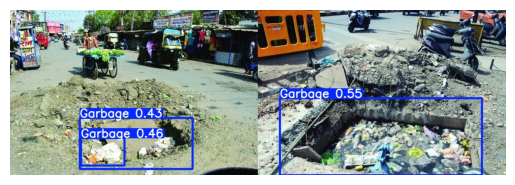

In [7]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/last.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/test1.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/test2.png: 384x640 1 Garbage, 37.5ms
Speed: 1.8ms preprocess, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


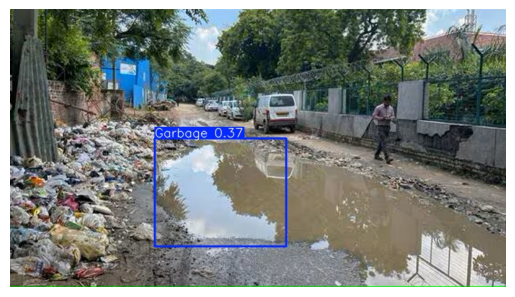

In [8]:
# Run inference
results = model('/kaggle/input/urban-issues-dataset/test2.png')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()